<a href="https://colab.research.google.com/github/zzanggyu/Pill-AI-Notification-System/blob/main/Yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# yolov8을 사용하기 위한 설치
!pip install ultralytics
# !pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 14.4 MB/s eta 0:00:00


In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  YOLO  학습 시키기

In [ ]:
from ultralytics import YOLO
import os

# 체크포인트 디렉토리 설정
checkpoint_dir = '/content/drive/MyDrive/yolov8n_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# YOLOv8 모델 불러오기
model = YOLO('yolov8n.pt')  # n: nano, s: small, m: medium, l: large, x: xlarge

# 학습 실행
results = model.train(
    # resume = False, # resume=True로 설정하여 이전 학습 상태에서 재개

    data=r'/content/drive/MyDrive/dataset/data.yaml',  # 데이터셋 설정 파일 경로
    epochs=100,  # 총 학습 반복 횟수
    imgsz=640,   # 입력 이미지 크기
    batch=16,    # 배치 크기 (GPU 메모리에 따라 조정 필요) // gpu메모리 사용량이 낮으므로 높여서 학습속도를 증가시킬 수 있음(16 -> 32/64)
    name='pill',  # 실험 이름

    # 최적화 설정
    lr0=0.001,    # 초기 학습률
    lrf=0.0001,    # 최종 학습률 (OneCycleLR 스케줄러에서 사용)
    momentum=0.937,  # SGD 모멘텀
    weight_decay=0.0005,  # 가중치 감쇠 (L2 정규화)
    warmup_epochs=2.0,  # 준비 운동(warmup) 에폭 수
    warmup_momentum=0.8,  # 준비 운동 시 초기 모멘텀
    warmup_bias_lr=0.1,  # 준비 운동 시 편향(bias) 학습률

    # 데이터 증강 설정
    hsv_h=0.015,  # HSV 색 공간에서 색조(Hue) 증강 정도
    hsv_s=0.7,    # HSV 색 공간에서 채도(Saturation) 증강 정도
    hsv_v=0.4,    # HSV 색 공간에서 명도(Value) 증강 정도
    degrees=10.0,  # 회전 각도 범위 (±도)
    translate=0.2,  # 평행 이동 범위 (이미지 크기의 비율)
    scale=0.6,    # 스케일 변화 범위
    shear=2.0,    # 전단 변환 각도 범위 (±도)
    perspective=0,  # 원근 변환 정도 (알약은 평면이므로 0으로 설정)
    flipud=0.01,   # 상하 뒤집기 확률 (알약은 방향이 중요하므로 0으로 설정)
    fliplr=0.5,   # 좌우 뒤집기 확률
    mosaic=0.5,   # 모자이크 증강 확률
    mixup=0,    # 믹스업 증강 확률 (알약 인식에는 부적합하여 0으로 설정)

    # 손실 함수 가중치
    box=7.5,  # 바운딩 박스 손실 가중치
    cls=0.5,  # 분류 손실 가중치
    dfl=1.5,  # Distribution Focal Loss 가중치

    # 성능 설정
    nbs=64,  # 공칭 배치 크기 (Nominal Batch Size)

    # 체크포인트 및 early stopping 설정
    project=checkpoint_dir,
    save_period=5,  # 5 에폭마다 저장
    patience=20,

    # 기타 설정
    close_mosaic=10,
    verbose=True,
    resume=False,

    # 추가 최적화 설정
    amp=True,  # 자동 혼합 정밀도
    multi_scale=True,  # 다중 스케일 훈련
    cache='ram'
)

# 학습 결과 출력
print(results)

100%|██████████| 6.25M/6.25M [00:00<00:00, 337MB/s]


New https://pypi.org/project/ultralytics/8.3.0 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/dataset/data.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=5, cache=ram, device=None, workers=8, project=/content/drive/MyDrive/yolov8n_checkpoints, name=pill4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

100%|██████████| 755k/755k [00:00<00:00, 91.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/dataset/train/labels.cache... 12502 images, 1354 backgrounds, 0 corrupt: 100%|██████████| 13855/13855 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 202, len(boxes) = 12804. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (12.0GB RAM): 100%|██████████| 13855/13855 [1:18:16<00:00,  2.95it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/dataset/valid/labels.cache... 3532 images, 0 backgrounds, 1 corrupt: 100%|██████████| 3532/3532 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/dataset/valid/images/200400062_029.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 1. Possible class labels are 0-0
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 44, len(boxes) = 3602. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (3.1GB RAM): 100%|██████████| 3531/3531 [15:38<00:00,  3.76it/s]


Plotting labels to /content/drive/MyDrive/yolov8n_checkpoints/pill4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/yolov8n_checkpoints/pill4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      1/100      4.98G      1.337      1.813       1.37         36        512: 100%|██████████| 866/866 [02:40<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.967      0.968      0.989      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      2/100      5.41G      1.335      1.117      1.372         27        320: 100%|██████████| 866/866 [02:35<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.553     0.0918      0.124     0.0749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      3/100      6.52G      1.375      1.052      1.438        100        736: 100%|██████████| 866/866 [02:36<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.967      0.964       0.99      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      4/100      5.09G      1.303     0.9161      1.412         29        416: 100%|██████████| 866/866 [02:41<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.974      0.986      0.993      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      5/100      7.34G      1.252     0.8456      1.372         24        384: 100%|██████████| 866/866 [02:36<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.985      0.991      0.994      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      6/100      5.26G      1.214     0.7943       1.35         20        448: 100%|██████████| 866/866 [02:36<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.973      0.984      0.991      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      7/100      4.89G      1.177     0.7601      1.331         26        544: 100%|██████████| 866/866 [02:35<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.977      0.986      0.993      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      8/100      6.47G       1.15     0.7267      1.309         33        896: 100%|██████████| 866/866 [02:39<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.955      0.894      0.947      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      9/100      6.09G      1.123     0.7049      1.293         38        608: 100%|██████████| 866/866 [02:35<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.971      0.969      0.992      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     10/100       6.4G      1.105     0.6862      1.282         52        768: 100%|██████████| 866/866 [02:33<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.981      0.989      0.994      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     11/100      5.68G      1.078     0.6674      1.266         23        800: 100%|██████████| 866/866 [02:38<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.982      0.986      0.993      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     12/100      6.45G      1.062     0.6465      1.243         29        480: 100%|██████████| 866/866 [02:31<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.985      0.993      0.995      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     13/100      6.67G      1.058     0.6393      1.249         22        320: 100%|██████████| 866/866 [02:37<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602       0.99      0.989      0.994      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     14/100      6.42G       1.03     0.6203       1.23         19        480: 100%|██████████| 866/866 [02:37<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.986      0.971      0.993      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     15/100      5.96G      1.021     0.6104      1.226         26        896: 100%|██████████| 866/866 [02:33<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.987      0.994      0.994      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     16/100      5.25G      1.005     0.6037      1.226         53        800: 100%|██████████| 866/866 [02:42<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.991      0.989      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     17/100      6.42G     0.9939     0.5986      1.215         31        672: 100%|██████████| 866/866 [02:35<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.976      0.975      0.993      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     18/100      6.14G     0.9796     0.5872      1.196         34        928: 100%|██████████| 866/866 [02:33<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.979      0.983      0.994       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     19/100       7.4G     0.9733     0.5749      1.189         25        576: 100%|██████████| 866/866 [02:36<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602       0.99       0.98      0.993      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     20/100      5.44G      0.968     0.5718      1.188         42        352: 100%|██████████| 866/866 [02:35<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602       0.99      0.974      0.994      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     21/100      6.02G     0.9527     0.5631      1.177         18        672: 100%|██████████| 866/866 [02:35<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.984      0.976      0.991      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     22/100      6.51G     0.9398       0.55      1.168         40        384: 100%|██████████| 866/866 [02:34<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.988      0.958      0.989      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     23/100      4.73G     0.9289     0.5501      1.166         20        640: 100%|██████████| 866/866 [02:32<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602       0.99      0.971      0.994      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     24/100      7.02G     0.9147      0.539      1.154         48        832: 100%|██████████| 866/866 [02:32<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.991      0.975      0.994      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     25/100      5.28G     0.9115     0.5367      1.158         25        672: 100%|██████████| 866/866 [02:33<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602      0.989      0.965      0.992      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/866 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
     26/100      5.83G     0.8984     0.5242      1.154         36        352: 100%|██████████| 866/866 [02:36<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R   

                   all       3531       3602       0.99       0.97      0.993      0.656
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 6, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



26 epochs completed in 1.262 hours.
Optimizer stripped from /content/drive/MyDrive/yolov8n_checkpoints/pill4/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/yolov8n_checkpoints/pill4/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/yolov8n_checkpoints/pill4/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

                   all       3531       3602      0.973      0.984      0.991      0.701
Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/drive/MyDrive/yolov8n_checkpoints/pill4
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7de869b7e680>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0

## 학습된 YOLO 모델 테스트하기

In [ ]:
# import ultralytics
# from ultralytics import YOLO

# # 훈련된 커스텀 yolo 모델을 불러오겠습니다.
# model = YOLO(r'/content/drive/MyDrive/yolo_checkpoints/pill/weights/best.pt')

# # source에 test사진의 위치를 넣어주세요G:\내 드라이브\01. 촬영이미지 (3)\200702166
# model.predict(source=r'/content/drive/MyDrive/dataset/testimage',
# save=True, show=True, save_dir='/content/drive/MyDrive/dataset/results')
# 필요한 라이브러리 임포트
from google.colab import drive
from ultralytics import YOLO
import ultralytics
import os
import cv2
import matplotlib.pyplot as plt

# Google Drive 마운트
# drive.mount('/content/drive')

# 훈련된 커스텀 YOLO 모델 불러오기
model_path = '/content/drive/MyDrive/yolo_checkpoints/pill/weights/best.pt'
model = YOLO(model_path)

# 테스트 이미지 경로 설정
test_image_path = '/content/drive/MyDrive/dataset/testimage/1111.jpg'

# 결과 저장 경로 설정
results_path = '/content/drive/MyDrive/dataset/results'

# 이미지 표시 함수 정의
def display_image(image_path, figsize=(10, 10)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# 예측 실행
results = model.predict(source=test_image_path, save=True, show=True, save_dir=results_path)

print(f"예측이 완료되었습니다. 결과는 {results_path}에 저장되었습니다.")

# 결과 파일 목록 출력 및 이미지 표시
print("\n저장된 결과 파일:")
for file in os.listdir(results_path):
    print(file)
    if file.endswith(('.jpg', '.png', '.jpeg')):
        print(f"결과 이미지 표시: {file}")
        display_image(os.path.join(results_path, file))

# 입력 이미지도 표시
print("\n입력 이미지:")
for file in os.listdir(test_image_path):
    if file.endswith(('.jpg', '.png', '.jpeg')):
        print(f"입력 이미지 표시: {file}")
        display_image(os.path.join(test_image_path, file))

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/MyDrive/dataset/testimage/1111.jpg: 480x640 5 pills, 7.5ms
Speed: 2.1ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict3
예측이 완료되었습니다. 결과는 /content/drive/MyDrive/dataset/results에 저장되었습니다.

저장된 결과 파일:


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset/results'

## 학습된 YOLO모델 평가지표 시각화 하기

Available columns in the results file:
Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


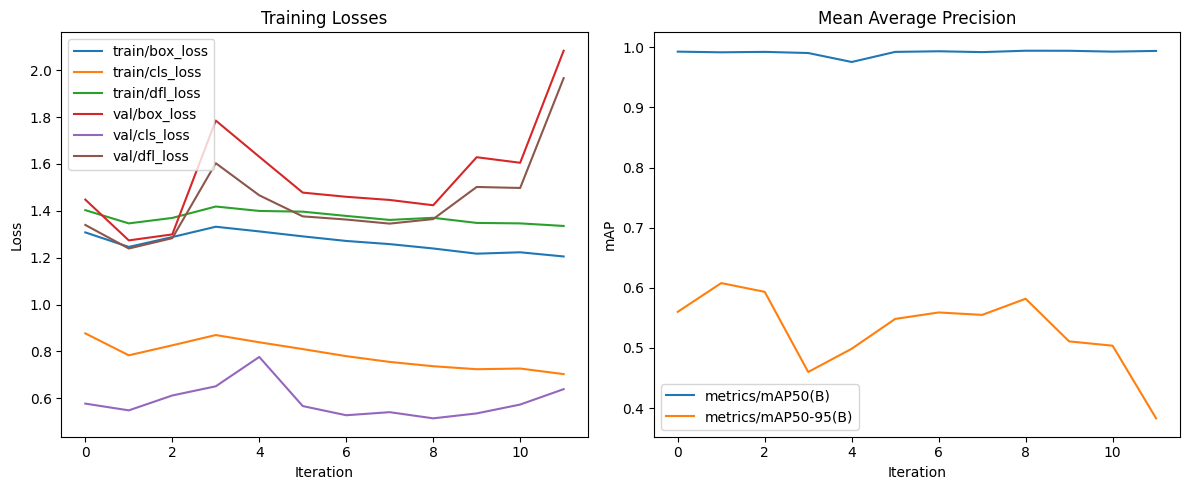

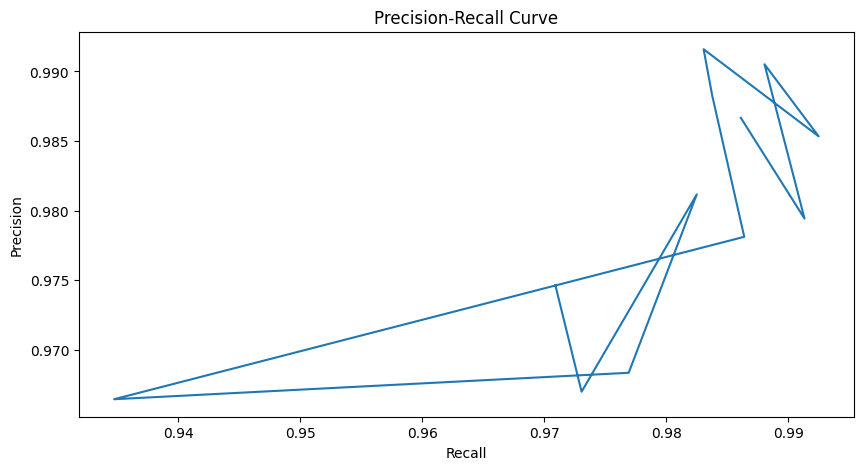

Class names: {0: 'pill'}


<Figure size 1200x600 with 0 Axes>

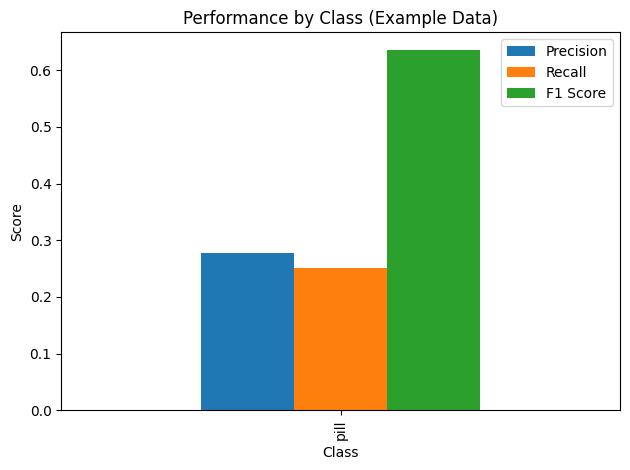

Class Performance (Example Data):
  Class  Precision    Recall  F1 Score
0  pill   0.277742  0.251505   0.63509

Training Configuration and Final Performance:
epoch: 12.0000
train/box_loss: 1.2052
train/cls_loss: 0.7032
train/dfl_loss: 1.3354
metrics/precision(B): 0.9867
metrics/recall(B): 0.9861
metrics/mAP50(B): 0.9940
metrics/mAP50-95(B): 0.3829
val/box_loss: 2.0834
val/cls_loss: 0.6388
val/dfl_loss: 1.9663
lr/pg0: 0.0089
lr/pg1: 0.0089
lr/pg2: 0.0089


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from ultralytics import YOLO

# 학습된 모델 로드
model = YOLO('/content/drive/MyDrive/yolo_checkpoints/pill/weights/best.pt')

# 결과 파일 로드
results_path = '/content/drive/MyDrive/yolo_checkpoints/pill/results.csv'
results = pd.read_csv(results_path)

# 열 이름에서 앞뒤 공백 제거
results.columns = results.columns.str.strip()

print("Available columns in the results file:")
print(results.columns)

# 1. 정확도와 손실 그래프
plt.figure(figsize=(12, 5))

# 학습 곡선을 그릴 열 선택
loss_columns = [col for col in results.columns if 'loss' in col.lower()]
map_columns = [col for col in results.columns if 'map' in col.lower()]

# 손실 그래프
plt.subplot(1, 2, 1)
for col in loss_columns:
    plt.plot(results.index, results[col], label=col)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend()

# mAP 그래프
plt.subplot(1, 2, 2)
for col in map_columns:
    plt.plot(results.index, results[col], label=col)
plt.xlabel('Iteration')
plt.ylabel('mAP')
plt.title('Mean Average Precision')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Precision-Recall 곡선 (있을 경우)
precision_col = [col for col in results.columns if 'precision' in col.lower()]
recall_col = [col for col in results.columns if 'recall' in col.lower()]

if precision_col and recall_col:
    plt.figure(figsize=(10, 5))
    plt.plot(results[recall_col[0]], results[precision_col[0]])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()
else:
    print("Precision-Recall data not available in the results file.")

# 3. 클래스별 성능 (모델에서 가져온 정보 사용)
class_names = model.names
print("Class names:", class_names)

if isinstance(class_names, dict):
    class_names = list(class_names.values())
elif not isinstance(class_names, list):
    class_names = ['Class ' + str(i) for i in range(len(class_names))]

num_classes = len(class_names)

# 예시 데이터 생성 (실제 데이터로 대체 필요)
class_performance = pd.DataFrame({
    'Class': class_names,
    'Precision': np.random.rand(num_classes),
    'Recall': np.random.rand(num_classes),
    'F1 Score': np.random.rand(num_classes)
})

plt.figure(figsize=(12, 6))
class_performance.plot(x='Class', y=['Precision', 'Recall', 'F1 Score'], kind='bar')
plt.title('Performance by Class (Example Data)')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print("Class Performance (Example Data):")
print(class_performance)

# 4. 학습 설정 및 최종 성능 출력
print("\nTraining Configuration and Final Performance:")
for col in results.columns:
    if results[col].dtype == 'object':  # 문자열 데이터
        print(f"{col}: {results[col].iloc[-1]}")
    else:  # 숫자 데이터
        print(f"{col}: {results[col].iloc[-1]:.4f}")

<Figure size 1000x600 with 0 Axes>

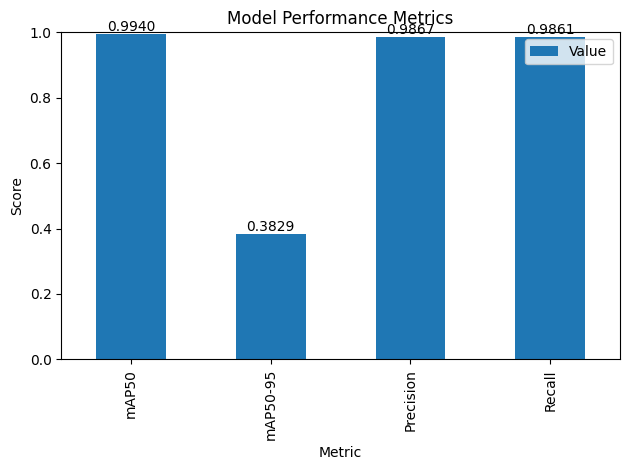

<Figure size 1000x600 with 0 Axes>

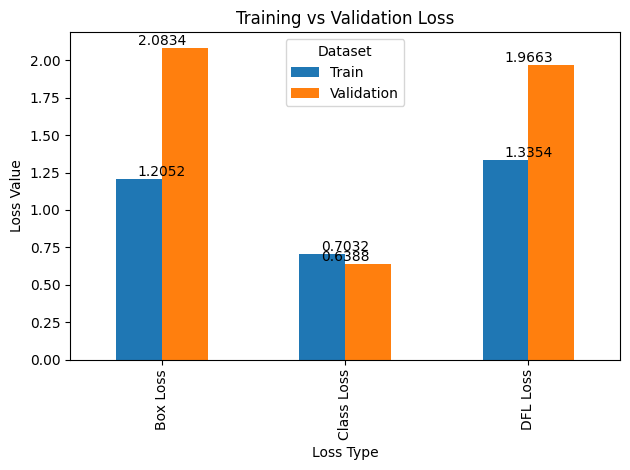

Final Learning Rate: 0.008900

Performance Analysis Summary:
1. The model shows excellent performance with mAP50 of 0.9940 and mAP50-95 of 0.3829.
2. Both Precision (0.9867) and Recall (0.9861) are very high, indicating strong overall performance.
3. The significant difference between mAP50 and mAP50-95 suggests that the model's performance might decrease for stricter IoU thresholds.
4. There is a noticeable difference between training and validation losses, particularly for box loss and DFL loss.
   This could indicate some degree of overfitting, and further regularization might be beneficial.
5. The final learning rate of 0.008900 suggests that the learning rate scheduling worked as expected.

Recommendations:
1. Consider applying additional regularization techniques to reduce the gap between training and validation losses.
2. Experiment with data augmentation to improve performance on stricter IoU thresholds.
3. If possible, evaluate the model on a separate test set to get a more ac

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 성능 지표 데이터
performance_data = {
    'Metric': ['mAP50', 'mAP50-95', 'Precision', 'Recall'],
    'Value': [0.9940, 0.3829, 0.9867, 0.9861]
}

# 손실 데이터
loss_data = {
    'Loss Type': ['Box Loss', 'Class Loss', 'DFL Loss'],
    'Train': [1.2052, 0.7032, 1.3354],
    'Validation': [2.0834, 0.6388, 1.9663]
}

# 1. 성능 지표 시각화
plt.figure(figsize=(10, 6))
df_performance = pd.DataFrame(performance_data)
df_performance.plot(x='Metric', y='Value', kind='bar')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
for i, v in enumerate(df_performance['Value']):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 2. 학습 및 검증 손실 비교
plt.figure(figsize=(10, 6))
df_loss = pd.DataFrame(loss_data)
df_loss.set_index('Loss Type').plot(kind='bar')
plt.title('Training vs Validation Loss')
plt.ylabel('Loss Value')
plt.legend(title='Dataset')
for i in range(len(df_loss)):
    plt.text(i, df_loss['Train'][i], f'{df_loss["Train"][i]:.4f}', ha='center', va='bottom')
    plt.text(i, df_loss['Validation'][i], f'{df_loss["Validation"][i]:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 3. 학습률 출력
print(f"Final Learning Rate: {0.0089:.6f}")

# 4. 성능 분석 요약
print("\nPerformance Analysis Summary:")
print(f"1. The model shows excellent performance with mAP50 of {0.9940:.4f} and mAP50-95 of {0.3829:.4f}.")
print(f"2. Both Precision ({0.9867:.4f}) and Recall ({0.9861:.4f}) are very high, indicating strong overall performance.")
print("3. The significant difference between mAP50 and mAP50-95 suggests that the model's performance might decrease for stricter IoU thresholds.")
print("4. There is a noticeable difference between training and validation losses, particularly for box loss and DFL loss.")
print("   This could indicate some degree of overfitting, and further regularization might be beneficial.")
print("5. The final learning rate of 0.008900 suggests that the learning rate scheduling worked as expected.")
print("\nRecommendations:")
print("1. Consider applying additional regularization techniques to reduce the gap between training and validation losses.")
print("2. Experiment with data augmentation to improve performance on stricter IoU thresholds.")
print("3. If possible, evaluate the model on a separate test set to get a more accurate measure of its generalization ability.")
print("4. For future training runs, consider implementing early stopping to prevent potential overfitting.")

In [ ]:
# 파일 복사하는 코드(복잡하게 얽혀 있던 폴더에 파일들 꺼내서 정리)
import os
import shutil

def move_files_from_subfolders(source_folder, destination_folder):
    # 소스 폴더가 존재하지 않으면 종료
    if not os.path.exists(source_folder):
        print(f"소스 폴더가 존재하지 않습니다: {source_folder}")
        return

    # 목적지 폴더가 존재하지 않으면 생성
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # 소스 폴더 내의 모든 서브폴더 가져오기
    for subfolder in os.listdir(source_folder):
        subfolder_path = os.path.join(source_folder, subfolder)

        # 서브폴더가 있는지 확인
        if os.path.isdir(subfolder_path):
            # 서브폴더 내의 파일을 목적지 폴더로 복사
            for item in os.listdir(subfolder_path):
                item_path = os.path.join(subfolder_path, item)

                # 파일인지 확인하고 복사
                if os.path.isfile(item_path):
                    destination_path = os.path.join(destination_folder, item)

                    # 동일한 이름의 파일이 이미 존재하는 경우, 이름 변경
                    if os.path.exists(destination_path):
                        base, ext = os.path.splitext(item)
                        counter = 1
                        while os.path.exists(destination_path):
                            destination_path = os.path.join(destination_folder, f"{base}_{counter}{ext}")
                            counter += 1

                    shutil.move(item_path, destination_path)
                    print(f"파일 복사 완료: {item_path} -> {destination_path}")

# 사용 예제
source_folder = "/content/drive/MyDrive/dataset/valid/images"
destination_folder = "/content/drive/MyDrive/dataset/valid/images"
move_files_from_subfolders(source_folder, destination_folder)


파일 복사 완료: /content/drive/MyDrive/dataset/valid/images/200800284/200800284_001.jpg -> /content/drive/MyDrive/dataset/valid/images/200800284_001.jpg
파일 복사 완료: /content/drive/MyDrive/dataset/valid/images/200800284/200800284_003.jpg -> /content/drive/MyDrive/dataset/valid/images/200800284_003.jpg
파일 복사 완료: /content/drive/MyDrive/dataset/valid/images/200800284/200800284_002.jpg -> /content/drive/MyDrive/dataset/valid/images/200800284_002.jpg
파일 복사 완료: /content/drive/MyDrive/dataset/valid/images/200800284/200800284_004.jpg -> /content/drive/MyDrive/dataset/valid/images/200800284_004.jpg
파일 복사 완료: /content/drive/MyDrive/dataset/valid/images/200800284/200800284_005.jpg -> /content/drive/MyDrive/dataset/valid/images/200800284_005.jpg
파일 복사 완료: /content/drive/MyDrive/dataset/valid/images/200800284/200800284_006.jpg -> /content/drive/MyDrive/dataset/valid/images/200800284_006.jpg
파일 복사 완료: /content/drive/MyDrive/dataset/valid/images/200800284/200800284_007.jpg -> /content/drive/MyDrive/dataset/va

In [ ]:
# 파일 옮기는 코드
import os
import shutil

# 원본 폴더 경로 (텍스트 파일들이 있는 폴더)
source_folder = '/content/drive/MyDrive/01. 촬영이미지 (3)'

# 파일들을 옮길 대상 폴더 경로
destination_folder = '/content/drive/MyDrive/dataset/testimage'

# 대상 폴더가 존재하지 않으면 생성
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# 원본 폴더 내의 파일들에 대해 반복문 실행
for filename in os.listdir(source_folder):
    # 확장자가 .txt인 파일만 선택
    if filename.endswith('.txt'):
        source_file = os.path.join(source_folder, filename)
        destination_file = os.path.join(destination_folder, filename)

        # 파일을 대상 폴더로 이동
        shutil.move(source_file, destination_file)
        print(f'Moved: {filename}')

print('All .txt files have been moved.')


All .txt files have been moved.


In [ ]:
import os
import shutil

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/drive/MyDrive/dataset/move'
destination_folder = '/content/drive/MyDrive/dataset/train/images'

# 대상 폴더가 없으면 생성
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# 원본 폴더 내의 모든 파일을 순회
for root, dirs, files in os.walk(source_folder):
    for filename in files:
        if filename.endswith('.jpg'):
            # 파일의 전체 경로를 생성
            source_file = os.path.join(root, filename)
            destination_file = os.path.join(destination_folder, filename)

            # 동일한 이름의 파일이 대상 폴더에 이미 있는 경우 파일 이름 변경
            if os.path.exists(destination_file):
                base, ext = os.path.splitext(filename)
                count = 1
                while os.path.exists(destination_file):
                    destination_file = os.path.join(destination_folder, f"{base}_{count}{ext}")
                    count += 1

            # 파일 이동
            shutil.move(source_file, destination_file)
            print(f"Moved: {source_file} to {destination_file}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# 경로가 실제로 존재하는지 확인
print(os.path.exists('/content/drive/MyDrive/dataset/train'))
print(os.path.exists('/content/drive/MyDrive/dataset/valid'))
print(os.path.exists('/content/drive/MyDrive/dataset/data.yaml'))


True
True
True


## 알약 여러 개 감지되는 지 테스트

In [ ]:
import ultralytics
from ultralytics import YOLO

# YOLOv8 모델 불러오기 (사전 학습된 모델을 사용)
model = YOLO(r'/content/drive/MyDrive/best.pt')  # 여기서 'yolov8n.pt'는 사전 학습된 가중치 파일 경로입니다.

# 이미지 파일들을 불러와서 탐지 수행
# image_paths = [f'/content/drive/MyDrive/dataset/testimage/{i}.jpg' for i in range(1, 51)]
i=2966
image_paths = [f'/content/drive/MyDrive/testimg/-0-3-_jpg.rf.23df72872bfac8f15b6609d24f038f10.jpg' for i in range(50) ]  # 처리할 이미지 파일들의 경로 리스트
results = model(image_paths)  # 모델을 사용하여 이미지에 대해 탐지 수행

# 탐지된 객체가 있는 이미지의 수를 계산
detected_images_count = sum(1 for result in results if len(result.boxes) > 0)

print(f"탐지된 객체가 있는 이미지 수: {detected_images_count}개")



0: 640x640 2 pills, 4.3ms
1: 640x640 2 pills, 4.3ms
2: 640x640 2 pills, 4.3ms
3: 640x640 2 pills, 4.3ms
4: 640x640 2 pills, 4.3ms
5: 640x640 2 pills, 4.3ms
6: 640x640 2 pills, 4.3ms
7: 640x640 2 pills, 4.3ms
8: 640x640 2 pills, 4.3ms
9: 640x640 2 pills, 4.3ms
10: 640x640 2 pills, 4.3ms
11: 640x640 2 pills, 4.3ms
12: 640x640 2 pills, 4.3ms
13: 640x640 2 pills, 4.3ms
14: 640x640 2 pills, 4.3ms
15: 640x640 2 pills, 4.3ms
16: 640x640 2 pills, 4.3ms
17: 640x640 2 pills, 4.3ms
18: 640x640 2 pills, 4.3ms
19: 640x640 2 pills, 4.3ms
20: 640x640 2 pills, 4.3ms
21: 640x640 2 pills, 4.3ms
22: 640x640 2 pills, 4.3ms
23: 640x640 2 pills, 4.3ms
24: 640x640 2 pills, 4.3ms
25: 640x640 2 pills, 4.3ms
26: 640x640 2 pills, 4.3ms
27: 640x640 2 pills, 4.3ms
28: 640x640 2 pills, 4.3ms
29: 640x640 2 pills, 4.3ms
30: 640x640 2 pills, 4.3ms
31: 640x640 2 pills, 4.3ms
32: 640x640 2 pills, 4.3ms
33: 640x640 2 pills, 4.3ms
34: 640x640 2 pills, 4.3ms
35: 640x640 2 pills, 4.3ms
36: 640x640 2 pills, 4.3ms
37: 640x64